# Association Rule

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from apyori import apriori

In [9]:
data=pd.read_csv('online_retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 08:26,3.39,17850.0,United Kingdom


In [11]:
#Melakukan proses cleaning data
data['Description']=data['Description'].str.strip()
data.dropna(subset=['InvoiceNo'], axis=0, inplace=True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data= data[~data['InvoiceNo'].str.contains('C')]
data['Total']=data.Quantity*data.UnitPrice
np.sum(data.isnull())
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 08:26,3.39,17850.0,United Kingdom,20.34


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID,Total
count,526653.000000,526653.000000,394343.000000,526653.000000
mean,10.127807,3.864697,15294.324923,19.764165
std,114.852790,41.992142,1713.606332,141.956364
min,-9600.000000,-11062.060000,12346.000000,-11062.060000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,74215.000000,13541.330000,18287.000000,77183.600000


In [5]:
a=len(data['InvoiceNo'].unique())
b=len(data['CustomerID'].unique())
print(a)
print(b)

24500
4338


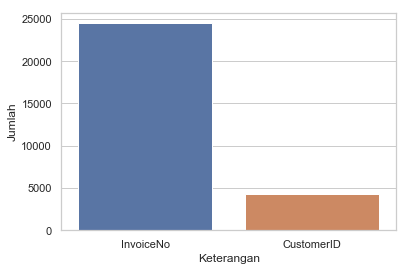

In [6]:
#Perbadingan nomor struk dan pengunjung/pembeli
sns.set(style="whitegrid")
c=pd.DataFrame([])
c['Keterangan']=["InvoiceNo","CustomerID"]
c['Jumlah']=[24500,4338]
bx = sns.barplot(x="Keterangan", y="Jumlah",data=c)
plt.show()

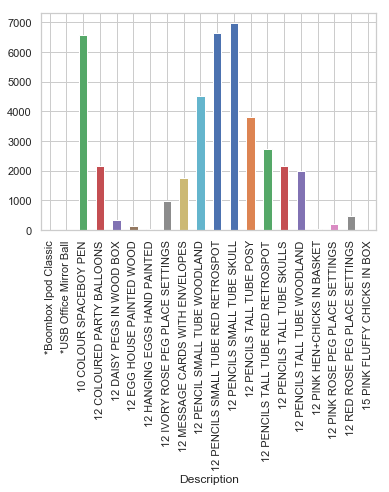

In [7]:
#Barang yang sering dibeli
Barang = data.groupby('Description')
jumlah = Barang['Quantity'].agg(np.sum)
jumlah.head(20).plot.bar()
plt.show()

## Apriori

In [16]:
#mengubah data frame menjadi list berdasarkan kelompok barang per transaksi
data2= data.groupby('InvoiceNo')
data_transaksi = []
for i,j in data2:
    data_transaksi.append(list(j['Description'].map(str)))
data_transaksi

[['WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN',
  'CREAM CUPID HEARTS COAT HANGER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'SET 7 BABUSHKA NESTING BOXES',
  'GLASS STAR FROSTED T-LIGHT HOLDER'],
 ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'],
 ['ASSORTED COLOUR BIRD ORNAMENT',
  "POPPY'S PLAYHOUSE BEDROOM",
  "POPPY'S PLAYHOUSE KITCHEN",
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'IVORY KNITTED MUG COSY',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BOX OF VINTAGE JIGSAW BLOCKS',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'HOME BUILDING BLOCK WORD',
  'LOVE BUILDING BLOCK WORD',
  'RECIPE BOX WITH METAL HEART',
  'DOORMAT NEW ENGLAND'],
 ['JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION',
  'BLUE COAT RACK PARIS FASHION'],
 ['BATH BUILDING BLOCK WORD'],
 ['ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED',
  'ALARM CLOCK BAKELIKE GREEN',
  'PANDA AND BUNNIES STICKER SHEET',
  

In [17]:
# penerapan alogaritma
association_rules=apriori(data_transaksi,min_support=0.005,
                         min_confidence=0.5,
                         min_left=3, min_length=3)
association_result=list(association_rules)

In [18]:
association_result[0]

RelationRecord(items=frozenset({'6 GIFT TAGS VINTAGE CHRISTMAS', "6 GIFT TAGS 50'S CHRISTMAS"}), support=0.006775510204081633, ordered_statistics=[OrderedStatistic(items_base=frozenset({"6 GIFT TAGS 50'S CHRISTMAS"}), items_add=frozenset({'6 GIFT TAGS VINTAGE CHRISTMAS'}), confidence=0.515527950310559, lift=38.62518282143332), OrderedStatistic(items_base=frozenset({'6 GIFT TAGS VINTAGE CHRISTMAS'}), items_add=frozenset({"6 GIFT TAGS 50'S CHRISTMAS"}), confidence=0.5076452599388379, lift=38.62518282143332)])

In [19]:
len(association_result)

3236

In [20]:
for item in association_result:
    #first index of the inner list
    #contains base item and add item
    pair=item[0]
    items=[x for x in pair]
    print("rule: " + items[0] + "->" + items[1])
    
    #second index of the inner list
    print("support: " + str(item[1]))
    
    #third index of the list located at 10th
    #of the third index of the inner list
    
    print("confidence: "+ str(item[2][0][2]))
    print("list: "+ str(item[2][0][3]))
    print("=============================================================")

rule: 6 GIFT TAGS VINTAGE CHRISTMAS->6 GIFT TAGS 50'S CHRISTMAS
support: 0.006775510204081633
confidence: 0.515527950310559
list: 38.62518282143332
rule: ROLL WRAP 50'S CHRISTMAS->6 GIFT TAGS 50'S CHRISTMAS
support: 0.006857142857142857
confidence: 0.5217391304347826
list: 36.10906411201179
rule: 6 RIBBONS RUSTIC CHARM->6 RIBBONS EMPIRE
support: 0.005020408163265306
confidence: 0.5466666666666666
list: 14.024432809773122
rule: 6 RIBBONS RUSTIC CHARM->CHOCOLATE BOX RIBBONS
support: 0.006530612244897959
confidence: 0.517799352750809
list: 13.28385774072756
rule: PACK OF 72 RETROSPOT CAKE CASES->60 CAKE CASES DOLLY GIRL DESIGN
support: 0.009877551020408163
confidence: 0.5537757437070938
list: 10.278413424866514
rule: PACK OF 72 RETROSPOT CAKE CASES->60 TEATIME FAIRY CAKE CASES
support: 0.018489795918367347
confidence: 0.5471014492753623
list: 10.154534475186649
rule: ABC TREASURE BOOK BOX->TREASURE ISLAND BOOK BOX
support: 0.005142857142857143
confidence: 0.5575221238938053
list: 51.15839

rule: VINTAGE PAISLEY STATIONERY SET->FLORAL FOLK STATIONERY SET
support: 0.009102040816326531
confidence: 0.5247058823529412
list: 29.484619535887752
rule: GARDENERS KNEELING PAD CUP OF TEA->GARDENERS KNEELING PAD KEEP CALM
support: 0.022285714285714287
confidence: 0.7203166226912929
list: 19.329416490620677
rule: KNEELING MAT HOUSEWORK  DESIGN->GARDENERS KNEELING PAD CUP OF TEA
support: 0.005877551020408163
confidence: 0.6260869565217391
list: 20.23631983480555
rule: KNEELING MAT HOUSEWORK  DESIGN->GARDENERS KNEELING PAD KEEP CALM
support: 0.006448979591836735
confidence: 0.6869565217391305
list: 18.434211152912045
rule: GIRAFFE WOODEN RULER->REVOLVER WOODEN RULER
support: 0.005877551020408163
confidence: 0.5255474452554745
list: 36.99974830103197
rule: GLASS APOTHECARY BOTTLE ELIXIR->GLASS APOTHECARY BOTTLE PERFUME
support: 0.005755102040816327
confidence: 0.6746411483253588
list: 67.18987046329792
rule: GLASS APOTHECARY BOTTLE ELIXIR->GLASS APOTHECARY BOTTLE TONIC
support: 0.005551

rule: LUNCH BAG PINK POLKADOT->LUNCH BAG RED RETROSPOT
support: 0.02473469387755102
confidence: 0.5559633027522936
list: 8.709143809099228
rule: LUNCH BAG RED RETROSPOT->LUNCH BAG SUKI DESIGN
support: 0.022693877551020408
confidence: 0.5124423963133641
list: 8.02739047933339
rule: LUNCH BAG WOODLAND->LUNCH BAG RED RETROSPOT
support: 0.02146938775510204
confidence: 0.5166994106090372
list: 8.09407644496254
rule: MAGIC DRAWING SLATE SPACEBOY->MAGIC DRAWING SLATE DOLLY GIRL
support: 0.005877551020408163
confidence: 0.6180257510729613
list: 58.01391149918602
rule: SMALL CERAMIC TOP STORAGE JAR->MEDIUM CERAMIC TOP STORAGE JAR
support: 0.005673469387755102
confidence: 0.562753036437247
list: 59.68592810698074
rule: RABBIT NIGHT LIGHT->MINI LIGHTS WOODLAND MUSHROOMS
support: 0.005020408163265306
confidence: 0.572093023255814
list: 14.100884376023584
rule: VINTAGE PAISLEY STATIONERY SET->MODERN FLORAL STATIONERY SET
support: 0.007755102040816327
confidence: 0.5191256830601093
list: 29.17105329

rule: SET/6 COLLAGE PAPER PLATES->SET/6 COLLAGE PAPER CUPS
support: 0.006571428571428572
confidence: 0.8895027624309393
list: 100.42773124220282
rule: SET/6 RED SPOTTY PAPER CUPS->SET/6 RED SPOTTY PAPER PLATES
support: 0.014285714285714285
confidence: 0.8177570093457944
list: 38.0171664686375
rule: SKULL LUNCH BOX WITH CUTLERY->STRAWBERRY LUNCH BOX WITH CUTLERY
support: 0.009224489795918367
confidence: 0.5485436893203883
list: 23.372731110173067
rule: SKULL SHOULDER BAG->SUKI  SHOULDER BAG
support: 0.010408163265306122
confidence: 0.6204379562043795
list: 28.680622503787355
rule: SMALL DOLLY MIX DESIGN ORANGE BOWL->SMALL CHOCOLATES PINK BOWL
support: 0.008326530612244898
confidence: 0.8292682926829268
list: 38.552321007081034
rule: SMALL MARSHMALLOWS PINK BOWL->SMALL CHOCOLATES PINK BOWL
support: 0.00820408163265306
confidence: 0.8170731707317072
list: 44.783652534511916
rule: SMALL MARSHMALLOWS PINK BOWL->SMALL DOLLY MIX DESIGN ORANGE BOWL
support: 0.014244897959183673
confidence: 0.6

rule: STRAWBERRY CHARLOTTE BAG->PACK OF 72 RETROSPOT CAKE CASES
support: 0.005224489795918367
confidence: 0.5565217391304348
list: 18.884740455257138
rule: PACK OF 72 RETROSPOT CAKE CASES->WOODLAND CHARLOTTE BAG
support: 0.005591836734693877
confidence: 0.5956521739130435
list: 17.47721947409529
rule: STRAWBERRY CHARLOTTE BAG->RED RETROSPOT CHARLOTTE BAG
support: 0.005510204081632653
confidence: 0.7142857142857143
list: 24.238227146814406
rule: WOODLAND CHARLOTTE BAG->RED RETROSPOT CHARLOTTE BAG
support: 0.005673469387755102
confidence: 0.7354497354497355
list: 21.579064094034155
rule: WOODLAND CHARLOTTE BAG->BOX OF 24 COCKTAIL PARASOLS
support: 0.005346938775510204
confidence: 0.6064814814814815
list: 17.794965624306943
rule: STRAWBERRY CHARLOTTE BAG->WOODLAND CHARLOTTE BAG
support: 0.0054285714285714284
confidence: 0.7823529411764706
list: 22.955265938710813
rule: SUKI  SHOULDER BAG->DOTCOM POSTAGE
support: 0.005142857142857143
confidence: 0.8873239436619718
list: 41.017804942864736


support: 0.005673469387755102
confidence: 0.6261261261261261
list: 14.138331880267364
rule: CHARLOTTE BAG APPLES DESIGN->RED RETROSPOT CHARLOTTE BAG
support: 0.0069387755102040816
confidence: 0.7657657657657657
list: 18.14435325073623
rule: CHARLOTTE BAG APPLES DESIGN->LUNCH BAG RED RETROSPOT
support: 0.005224489795918367
confidence: 0.5765765765765766
list: 19.56527164283397
rule: CHARLOTTE BAG APPLES DESIGN->WOODLAND CHARLOTTE BAG
support: 0.005877551020408163
confidence: 0.6486486486486486
list: 19.032205858553162
rule: LUNCH BAG SPACEBOY DESIGN->CHARLOTTE BAG APPLES DESIGN
support: 0.005346938775510204
confidence: 0.7528735632183908
list: 17.83888036639321
rule: CHARLOTTE BAG APPLES DESIGN->RED RETROSPOT CHARLOTTE BAG
support: 0.005959183673469388
confidence: 0.7263681592039801
list: 17.210850967599143
rule: CHARLOTTE BAG APPLES DESIGN->WOODLAND CHARLOTTE BAG
support: 0.0056326530612244895
confidence: 0.6865671641791045
list: 20.144785056752166
rule: CHARLOTTE BAG APPLES DESIGN->PA

confidence: 0.5428571428571428
list: 15.92814371257485
rule: JUMBO BAG STRAWBERRY->RED RETROSPOT CHARLOTTE BAG
support: 0.00526530612244898
confidence: 0.7633136094674556
list: 18.086250901308187
rule: JUMBO STORAGE BAG SUKI->RED RETROSPOT CHARLOTTE BAG
support: 0.006816326530612245
confidence: 0.784037558685446
list: 18.5772922512509
rule: JUMBO STORAGE BAG SUKI->WOODLAND CHARLOTTE BAG
support: 0.005469387755102041
confidence: 0.6291079812206573
list: 18.458856934019284
rule: LUNCH BAG  BLACK SKULL.->LUNCH BAG CARS BLUE
support: 0.006408163265306122
confidence: 0.5793357933579335
list: 12.342371249799452
rule: LUNCH BAG PINK POLKADOT->LUNCH BAG  BLACK SKULL.
support: 0.005877551020408163
confidence: 0.5313653136531364
list: 11.94353227935949
rule: LUNCH BAG RED RETROSPOT->LUNCH BAG  BLACK SKULL.
support: 0.006857142857142857
confidence: 0.6199261992619925
list: 9.711120129104104
rule: LUNCH BAG SPACEBOY DESIGN->LUNCH BAG  BLACK SKULL.
support: 0.0060408163265306125
confidence: 0.54612

confidence: 0.5972222222222223
list: 6.994237306139793
rule: WOODLAND CHARLOTTE BAG->JUMBO BAG RED RETROSPOT
support: 0.0069387755102040816
confidence: 0.5246913580246914
list: 15.395135654616693
rule: RED RETROSPOT CHARLOTTE BAG->CHARLOTTE BAG SUKI DESIGN
support: 0.005061224489795919
confidence: 0.6966292134831461
list: 16.50620476821768
rule: JUMBO BAG WOODLAND ANIMALS->WOODLAND CHARLOTTE BAG
support: 0.00510204081632653
confidence: 0.6868131868131868
list: 20.152003684937817
rule: JUMBO SHOPPER VINTAGE RED PAISLEY->RED RETROSPOT CHARLOTTE BAG
support: 0.00526530612244898
confidence: 0.6482412060301507
list: 15.359680413673784
rule: JUMBO STORAGE BAG SUKI->RED RETROSPOT CHARLOTTE BAG
support: 0.0074285714285714285
confidence: 0.6476868327402135
list: 15.346544876339683
rule: JUMBO STORAGE BAG SUKI->STRAWBERRY CHARLOTTE BAG
support: 0.005510204081632653
confidence: 0.7297297297297297
list: 20.27027027027027
rule: JUMBO STORAGE BAG SUKI->WOODLAND CHARLOTTE BAG
support: 0.0062857142857

support: 0.006857142857142857
confidence: 0.6693227091633466
list: 22.712474202911345
rule: WOODLAND CHARLOTTE BAG->RED RETROSPOT CHARLOTTE BAG
support: 0.006653061224489796
confidence: 0.649402390438247
list: 19.054321635613235
rule: STRAWBERRY CHARLOTTE BAG->WOODLAND CHARLOTTE BAG
support: 0.006408163265306122
confidence: 0.7621359223300971
list: 22.362071972559736
rule: CHILDRENS CUTLERY POLKADOT BLUE->CHILDRENS CUTLERY RETROSPOT RED
support: 0.005714285714285714
confidence: 0.6363636363636364
list: 49.18267852021795
rule: CHOCOLATE HOT WATER BOTTLE->HOT WATER BOTTLE KEEP CALM
support: 0.005918367346938775
confidence: 0.5390334572490706
list: 20.100943230749206
rule: CHOCOLATE HOT WATER BOTTLE->HOT WATER BOTTLE TEA AND SYMPATHY
support: 0.007714285714285714
confidence: 0.5658682634730539
list: 21.101632351734885
rule: REGENCY CAKESTAND 3 TIER->CHOCOLATE HOT WATER BOTTLE
support: 0.00510204081632653
confidence: 0.6443298969072164
list: 24.027522791821614
rule: RETROSPOT HEART HOT WAT

support: 0.005224489795918367
confidence: 0.6066350710900473
list: 12.202429590891757
rule: JUMBO BAG PINK POLKADOT->JUMBO BAG SPACEBOY DESIGN
support: 0.005510204081632653
confidence: 0.6490384615384616
list: 13.055371352785148
rule: JUMBO BAG PINK POLKADOT->JUMBO BAG TOYS
support: 0.007142857142857143
confidence: 0.5072463768115941
list: 23.762019563831846
rule: JUMBO BAG WOODLAND ANIMALS->JUMBO BAG PINK POLKADOT
support: 0.009387755102040816
confidence: 0.6666666666666666
list: 18.92622634221707
rule: JUMBO SHOPPER VINTAGE RED PAISLEY->JUMBO BAG PINK POLKADOT
support: 0.009061224489795919
confidence: 0.6434782608695652
list: 13.417206290471784
rule: JUMBO STORAGE BAG SUKI->JUMBO BAG PINK POLKADOT
support: 0.009510204081632653
confidence: 0.6753623188405797
list: 13.974980415197807
rule: NATURAL SLATE HEART CHALKBOARD->JUMBO BAG PINK POLKADOT
support: 0.005183673469387755
confidence: 0.6479591836734694
list: 22.422316384180792
rule: JUMBO BAG PINK POLKADOT->PAPER BUNTING RETROSPOT
su

rule: JUMBO BAG WOODLAND ANIMALS->SUKI  SHOULDER BAG
support: 0.007224489795918367
confidence: 0.5267857142857143
list: 14.955098493626881
rule: WHITE HANGING HEART T-LIGHT HOLDER->JUMBO BAG WOODLAND ANIMALS
support: 0.006
confidence: 0.5404411764705882
list: 15.342768045804647
rule: JUMBO BAG WOODLAND ANIMALS->WOODEN PICTURE FRAME WHITE FINISH
support: 0.006081632653061225
confidence: 0.6506550218340612
list: 18.471666320897448
rule: JUMBO SHOPPER VINTAGE RED PAISLEY->JUMBO STORAGE BAG SKULLS
support: 0.005755102040816327
confidence: 0.6682464454976303
list: 13.933649289099527
rule: JUMBO STORAGE BAG SUKI->JUMBO SHOPPER VINTAGE RED PAISLEY
support: 0.010408163265306122
confidence: 0.7024793388429752
list: 14.536101183828455
rule: JUMBO SHOPPER VINTAGE RED PAISLEY->NATURAL SLATE HEART CHALKBOARD
support: 0.005224489795918367
confidence: 0.7441860465116279
list: 25.75220076205492
rule: PICNIC BASKET WICKER SMALL->JUMBO SHOPPER VINTAGE RED PAISLEY
support: 0.005061224489795919
confidence

rule: RED TOADSTOOL LED NIGHT LIGHT->SUKI  SHOULDER BAG
support: 0.007306122448979592
confidence: 0.5718849840255592
list: 26.436192657785284
rule: RED TOADSTOOL LED NIGHT LIGHT->VICTORIAN GLASS HANGING T-LIGHT
support: 0.005387755102040816
confidence: 0.5789473684210527
list: 16.70696175066642
rule: VINTAGE PAISLEY STATIONERY SET->RED TOADSTOOL LED NIGHT LIGHT
support: 0.005142857142857143
confidence: 0.5185185185185185
list: 14.96313746019282
rule: RED TOADSTOOL LED NIGHT LIGHT->VINTAGE SNAP CARDS
support: 0.0058367346938775514
confidence: 0.704433497536946
list: 20.328175135047324
rule: WHITE HANGING HEART T-LIGHT HOLDER->RED TOADSTOOL LED NIGHT LIGHT
support: 0.00710204081632653
confidence: 0.5559105431309904
list: 6.0264638525262235
rule: RED TOADSTOOL LED NIGHT LIGHT->WOODEN PICTURE FRAME WHITE FINISH
support: 0.005061224489795919
confidence: 0.5414847161572053
list: 15.625884035160812
rule: RED TOADSTOOL LED NIGHT LIGHT->WOODLAND CHARLOTTE BAG
support: 0.005061224489795919
confi

rule: ROSES REGENCY TEACUP AND SAUCER->GREEN REGENCY TEACUP AND SAUCER
support: 0.022122448979591838
confidence: 0.8562401263823065
list: 19.679064818355073
rule: GREEN REGENCY TEACUP AND SAUCER->PINK REGENCY TEACUP AND SAUCER
support: 0.005918367346938775
confidence: 0.6387665198237886
list: 20.430521848149898
rule: GREEN REGENCY TEACUP AND SAUCER->PINK REGENCY TEACUP AND SAUCER
support: 0.006571428571428572
confidence: 0.7252252252252253
list: 23.19584597652483
rule: SET OF 4 PANTRY JELLY MOULDS->GREEN REGENCY TEACUP AND SAUCER
support: 0.005142857142857143
confidence: 0.6774193548387096
list: 21.66680704118588
rule: GREEN REGENCY TEACUP AND SAUCER->PINK REGENCY TEACUP AND SAUCER
support: 0.005142857142857143
confidence: 0.6146341463414634
list: 19.658663949563778
rule: WHITE HANGING HEART T-LIGHT HOLDER->GREEN REGENCY TEACUP AND SAUCER
support: 0.006489795918367347
confidence: 0.5910780669144982
list: 18.90523843264387
rule: GREEN REGENCY TEACUP AND SAUCER->RECIPE BOX PANTRY YELLOW 

rule: WHITE HANGING HEART T-LIGHT HOLDER->NATURAL SLATE HEART CHALKBOARD
support: 0.00526530612244898
confidence: 0.5420168067226891
list: 5.875845913586675
rule: PACK OF 60 PINK PAISLEY CAKE CASES->PACK OF 72 RETROSPOT CAKE CASES
support: 0.005469387755102041
confidence: 0.6175115207373272
list: 11.4613880742913
rule: ROSES REGENCY TEACUP AND SAUCER->PINK REGENCY TEACUP AND SAUCER
support: 0.0060408163265306125
confidence: 0.8314606741573034
list: 19.109555831945528
rule: ROSES REGENCY TEACUP AND SAUCER->RECIPE BOX PANTRY YELLOW DESIGN
support: 0.005020408163265306
confidence: 0.5146443514644352
list: 11.288081119855562
rule: SET OF 3 CAKE TINS PANTRY DESIGN->RECIPE BOX PANTRY YELLOW DESIGN
support: 0.00726530612244898
confidence: 0.5393939393939394
list: 9.541625642708675
rule: SET OF 4 PANTRY JELLY MOULDS->RECIPE BOX PANTRY YELLOW DESIGN
support: 0.0056326530612244895
confidence: 0.5
list: 10.542168674698795
rule: SUKI  SHOULDER BAG->RECIPE BOX PANTRY YELLOW DESIGN
support: 0.005673

list: 17.547179699191204
rule: JUMBO BAG WOODLAND ANIMALS->RED TOADSTOOL LED NIGHT LIGHT
support: 0.005020408163265306
confidence: 0.6648648648648648
list: 18.875074379129998
rule: JUMBO SHOPPER VINTAGE RED PAISLEY->JUMBO STORAGE BAG SKULLS
support: 0.005673469387755102
confidence: 0.5720164609053497
list: 11.927151738026442
rule: JUMBO STORAGE BAG SUKI->JUMBO SHOPPER VINTAGE RED PAISLEY
support: 0.00836734693877551
confidence: 0.6156156156156156
list: 12.73866772177583
rule: JUMBO STORAGE BAG SUKI->JUMBO STORAGE BAG SKULLS
support: 0.0067346938775510205
confidence: 0.6790123456790124
list: 14.050508842175509
rule: JUMBO STORAGE BAG SUKI->LUNCH BAG APPLE DESIGN
support: 0.0054285714285714284
confidence: 0.6717171717171717
list: 16.827270661626493
rule: JUMBO STORAGE BAG SUKI->LUNCH BAG SUKI DESIGN
support: 0.005224489795918367
confidence: 0.547008547008547
list: 11.319011319011317
rule: JUMBO STORAGE BAG SUKI->RECYCLING BAG RETROSPOT
support: 0.00526530612244898
confidence: 0.648241206

list: 8.835743307839387
rule: JUMBO STORAGE BAG SUKI->JUMBO BAG RED RETROSPOT
support: 0.010448979591836735
confidence: 0.5953488372093023
list: 12.319296040226272
rule: LUNCH BAG RED RETROSPOT->JUMBO BAG RED RETROSPOT
support: 0.006244897959183674
confidence: 0.7355769230769231
list: 8.614548095308134
rule: RECYCLING BAG RETROSPOT->JUMBO BAG RED RETROSPOT
support: 0.006
confidence: 0.786096256684492
list: 9.206194210693143
rule: JUMBO BAG VINTAGE LEAF->JUMBO BAG RED RETROSPOT
support: 0.006081632653061225
confidence: 0.7198067632850242
list: 8.429859321454634
rule: JUMBO BAG WOODLAND ANIMALS->JUMBO BAG RED RETROSPOT
support: 0.006530612244897959
confidence: 0.7142857142857143
list: 8.365200764818356
rule: JUMBO SHOPPER VINTAGE RED PAISLEY->JUMBO BAG RED RETROSPOT
support: 0.006979591836734694
confidence: 0.7008196721311476
list: 8.207496160235715
rule: JUMBO STORAGE BAG SKULLS->JUMBO BAG RED RETROSPOT
support: 0.0058367346938775514
confidence: 0.6842105263157895
list: 8.01298178524705

confidence: 0.5609756097560975
list: 10.796466959170768
rule: JUMBO STORAGE BAG SUKI->LUNCH BAG RED RETROSPOT
support: 0.006653061224489796
confidence: 0.5780141843971631
list: 9.05457002412436
rule: JUMBO STORAGE BAG SUKI->LUNCH BAG  BLACK SKULL.
support: 0.006
confidence: 0.5212765957446809
list: 11.770761839396021
rule: JUMBO STORAGE BAG SUKI->LUNCH BAG RED RETROSPOT
support: 0.0054285714285714284
confidence: 0.5541666666666667
list: 8.680999573742541
rule: JUMBO STORAGE BAG SUKI->LUNCH BAG CARS BLUE
support: 0.005142857142857143
confidence: 0.525
list: 11.85483870967742
rule: JUMBO STORAGE BAG SUKI->LUNCH BAG PINK POLKADOT
support: 0.006408163265306122
confidence: 0.6382113821138211
list: 9.997556817000396
rule: JUMBO STORAGE BAG SUKI->LUNCH BAG RED RETROSPOT
support: 0.00710204081632653
confidence: 0.5087719298245613
list: 11.488398415393322
rule: JUMBO STORAGE BAG SUKI->SUKI  SHOULDER BAG
support: 0.005142857142857143
confidence: 0.5361702127659574
list: 17.56172488337695
rule: J

confidence: 0.6276150627615062
list: 13.29003374041219
rule: LUNCH BAG SPACEBOY DESIGN->LUNCH BAG WOODLAND
support: 0.010653061224489797
confidence: 0.5403726708074534
list: 13.005039719825746
rule: LUNCH BAG SPACEBOY DESIGN->RED RETROSPOT CHARLOTTE BAG
support: 0.006979591836734694
confidence: 0.5606557377049181
list: 11.872139648894116
rule: LUNCH BAG SPACEBOY DESIGN->STRAWBERRY CHARLOTTE BAG
support: 0.006122448979591836
confidence: 0.5617977528089887
list: 11.89632233692327
rule: LUNCH BAG SPACEBOY DESIGN->WOODLAND CHARLOTTE BAG
support: 0.005673469387755102
confidence: 0.5285171102661597
list: 11.19158962966371
rule: LUNCH BAG VINTAGE LEAF DESIGN->LUNCH BAG CARS BLUE
support: 0.006612244897959183
confidence: 0.6778242677824268
list: 15.305709272506412
rule: LUNCH BAG WOODLAND->LUNCH BAG CARS BLUE
support: 0.009265306122448979
confidence: 0.5066964285714285
list: 11.441532258064516
rule: PARTY BUNTING->LUNCH BAG CARS BLUE
support: 0.0054285714285714284
confidence: 0.591111111111111

support: 0.005469387755102041
confidence: 0.7613636363636364
list: 61.158718330849474
rule: REGENCY TEA PLATE GREEN->REGENCY TEA PLATE ROSES
support: 0.006
confidence: 0.8352272727272727
list: 45.9844228804903
rule: REGENCY TEA PLATE GREEN->ROSES REGENCY TEACUP AND SAUCER
support: 0.005183673469387755
confidence: 0.7215909090909091
list: 16.584406447211325
rule: REGENCY TEA PLATE PINK->REGENCY TEA PLATE ROSES
support: 0.00526530612244898
confidence: 0.8958333333333334
list: 49.32116104868914
rule: ROSES REGENCY TEACUP AND SAUCER->REGENCY TEA PLATE ROSES
support: 0.006408163265306122
confidence: 0.7621359223300971
list: 17.51625712672362
rule: ROSES REGENCY TEACUP AND SAUCER->REGENCY TEAPOT ROSES
support: 0.006204081632653061
confidence: 0.672566371681416
list: 15.457669893240798
rule: ROSES REGENCY TEACUP AND SAUCER->SET OF 3 CAKE TINS PANTRY DESIGN
support: 0.005306122448979592
confidence: 0.5485232067510548
list: 6.75657042001048
rule: SET OF 3 REGENCY CAKE TINS->ROSES REGENCY TEACUP

support: 0.007183673469387755
confidence: 0.6795366795366795
list: 23.059070150482892
rule: WOODLAND CHARLOTTE BAG->RED RETROSPOT CHARLOTTE BAG
support: 0.00726530612244898
confidence: 0.6872586872586872
list: 20.165075254895612
rule: STRAWBERRY CHARLOTTE BAG->WOODLAND CHARLOTTE BAG
support: 0.006285714285714286
confidence: 0.7661691542288558
list: 22.480412309708942
rule: LUNCH BAG SPACEBOY DESIGN->STRAWBERRY CHARLOTTE BAG
support: 0.005959183673469388
confidence: 0.7643979057591622
list: 25.938710098475728
rule: LUNCH BAG SPACEBOY DESIGN->WOODLAND CHARLOTTE BAG
support: 0.005795918367346939
confidence: 0.743455497382199
list: 21.81396369564536
rule: LUNCH BAG SPACEBOY DESIGN->STRAWBERRY CHARLOTTE BAG
support: 0.005306122448979592
confidence: 0.8176100628930818
list: 23.989756336383838
rule: STRAWBERRY CHARLOTTE BAG->RED RETROSPOT CHARLOTTE BAG
support: 0.006163265306122449
confidence: 0.766497461928934
list: 26.00995542556632
rule: WOODLAND CHARLOTTE BAG->RED RETROSPOT CHARLOTTE BAG


rule: JUMBO SHOPPER VINTAGE RED PAISLEY->JUMBO BAG SCANDINAVIAN BLUE PAISLEY
support: 0.006408163265306122
confidence: 0.7440758293838862
list: 15.514772612685286
rule: JUMBO STORAGE BAG SUKI->JUMBO BAG SCANDINAVIAN BLUE PAISLEY
support: 0.005877551020408163
confidence: 0.6824644549763033
list: 14.121941847060329
rule: JUMBO SHOPPER VINTAGE RED PAISLEY->JUMBO BAG RED RETROSPOT
support: 0.005020408163265306
confidence: 0.6795580110497238
list: 14.16950746444105
rule: JUMBO STORAGE BAG SUKI->JUMBO BAG RED RETROSPOT
support: 0.005387755102040816
confidence: 0.7292817679558011
list: 15.090712259220547
rule: JUMBO BAG WOODLAND ANIMALS->JUMBO BAG RED RETROSPOT
support: 0.005061224489795919
confidence: 0.7209302325581396
list: 20.46673313751381
rule: JUMBO STORAGE BAG SUKI->JUMBO BAG RED RETROSPOT
support: 0.005142857142857143
confidence: 0.7325581395348837
list: 15.15850879949717
rule: JUMBO BAG WOODLAND ANIMALS->JUMBO BAG RED RETROSPOT
support: 0.006612244897959183
confidence: 0.69527896995

rule: JUMBO BAG WOODLAND ANIMALS->JUMBO BAG SCANDINAVIAN BLUE PAISLEY
support: 0.005959183673469388
confidence: 0.7849462365591399
list: 16.366964081445897
rule: JUMBO STORAGE BAG SUKI->JUMBO BAG WOODLAND ANIMALS
support: 0.005714285714285714
confidence: 0.7526881720430108
list: 15.575050857308922
rule: JUMBO STORAGE BAG SUKI->JUMBO SHOPPER VINTAGE RED PAISLEY
support: 0.007591836734693877
confidence: 0.6763636363636364
list: 13.995700245700245
rule: JUMBO BAG WOODLAND ANIMALS->JUMBO BAG RED RETROSPOT
support: 0.005061224489795919
confidence: 0.8157894736842106
list: 23.15972433981826
rule: JUMBO BAG WOODLAND ANIMALS->JUMBO BAG RED RETROSPOT
support: 0.0056326530612244895
confidence: 0.6330275229357798
list: 13.199297286746047
rule: JUMBO STORAGE BAG SUKI->JUMBO BAG WOODLAND ANIMALS
support: 0.006326530612244898
confidence: 0.7110091743119267
list: 14.712605380609968
rule: JUMBO STORAGE BAG SUKI->JUMBO SHOPPER VINTAGE RED PAISLEY
support: 0.006653061224489796
confidence: 0.772511848341

rule: STRAWBERRY CHARLOTTE BAG->WOODLAND CHARLOTTE BAG
support: 0.006979591836734694
confidence: 0.7599999999999999
list: 22.299401197604787
rule: LUNCH BAG APPLE DESIGN->LUNCH BAG RED RETROSPOT
support: 0.005183673469387755
confidence: 0.7215909090909091
list: 11.303693908393397
rule: LUNCH BAG APPLE DESIGN->LUNCH BAG CARS BLUE
support: 0.005387755102040816
confidence: 0.75
list: 16.935483870967744
rule: LUNCH BAG APPLE DESIGN->LUNCH BAG PINK POLKADOT
support: 0.005142857142857143
confidence: 0.7636363636363636
list: 11.962334340850965
rule: LUNCH BAG SPACEBOY DESIGN->LUNCH BAG APPLE DESIGN
support: 0.005224489795918367
confidence: 0.63681592039801
list: 13.484866075843774
rule: LUNCH BAG APPLE DESIGN->LUNCH BAG RED RETROSPOT
support: 0.005755102040816327
confidence: 0.701492537313433
list: 15.840154068367843
rule: LUNCH BAG SPACEBOY DESIGN->LUNCH BAG APPLE DESIGN
support: 0.005510204081632653
confidence: 0.7068062827225131
list: 15.960141867927717
rule: LUNCH BAG RED RETROSPOT->LUNCH